# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
# Your code here.
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

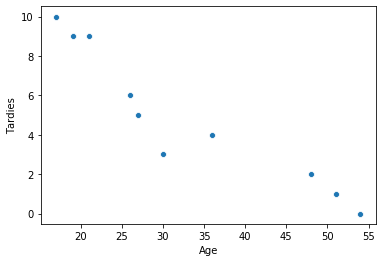

In [3]:
# Your code here.
sns.scatterplot(x="Age", y="Tardies", data=student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# As "age" increases, "tardies" decreases.
# There seems to be a negative correlation between the two variables.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Your response here.
#correlation:
cor_value = student_data["Age"].corr(student_data["Tardies"])

#covariance:
cov_value = student_data["Age"].cov(student_data["Tardies"])

print(cor_value, cov_value)

-0.9391626886887122 -45.56666666666666


In [ ]:
"""
These values are a measure of how changes to one variable influence the other.
Correlation varies between -1 and 1. Because covariance is calculated considering 
the absolute distance to the mean of each observation, the result is not limited
to such range.

The absolute correlation value is greater than 0.7 so we can say that there is a
strong correlation between age and tardiness.
Both correlation and covariance have negative values, so the correlation is negative.
This means that as one variable increases, the other decreases.
"""

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [5]:
# Your response here.
# Using linear regression and taking "Tardies" as outcome variable,
# we can attempt to predict how late a student will be based on their age.
# According to the linear regression model: tardies = slope * age + intercept

slope, intercept, r_value, _, std_err = stats.linregress(student_data["Age"], student_data["Tardies"])
#print(slope, intercept, r_value, std_err)

def predict_tardies(age):
    return slope * age + intercept

test = predict_tardies(24)
test

7.061104861152229

Plot your regression model on your scatter plot.

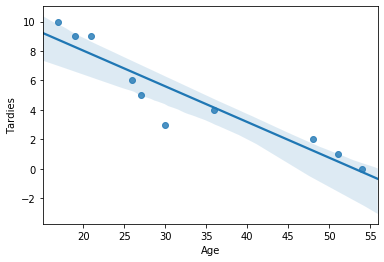

In [6]:
# Your code here.
sns.regplot(x="Age", y="Tardies", data=student_data, fit_reg=True)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
"""
The model indicates that older students are less likely to be late 
and younger students are more likely to be late.
There is a definite outlier (age=30) and the model is based on a very 
small sample, so the level of confidence in the results is reduced.
Still, the correlation value obtained from this sample is very high
and it would be interesting to see if a larger sample would display
a similar correlation, even if it seems unlikely that it would be
possible to obtain such a high correlation value.
"""

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [7]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")
vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [8]:
# Your response here. 
vehicles_cut = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year", "CO2 Emission Grams/Mile"]]
corr_table = vehicles_cut.corr()

# correlation between "CO2 Emission Grams/Mile" and the other columns
corr_table["CO2 Emission Grams/Mile"][0:-1]

Year                -0.222300
Cylinders            0.752393
Fuel Barrels/Year    0.986189
Combined MPG        -0.926229
Fuel Cost/Year       0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

In [ ]:
"""
"Year" seems to be the least relevant to determine CO2 emissions,
as it has the lowest absolute correlation value with the outcome variable.

"Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year" all have very high absolute
r-values and so are strongly correlated with the amount of CO2 emissions:

1) "Fuel Barrels/Year" (positive correlation):
   A vehicle that spends more fuel emits more CO2.
2) "Combined MPG" (negative correlation):
   A vehicle that does less miles on the same fuel, also emits more CO2 overall.
3) "Fuel Cost/Year" (positive correlation):
   A high cost/year means more fuel is spent and so more CO2 is emitted.
   The relationship is similar to "Fuel Barrels/Year"-"CO2 Emission Grams/Mile",
   except that the cost of the fuel is variable and influenced by other external factors.
"""

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [9]:
# Your response here.

# Using linear regression, with CO2 emission as the outcome variable:

Y = vehicles["CO2 Emission Grams/Mile"]
X = vehicles[["Year", "Cylinders", "Fuel Barrels/Year", "Combined MPG", "Fuel Cost/Year"]]

lm = LinearRegression()
model = lm.fit(X,Y)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [11]:
# Your response here.
print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)
print("Score: ", lm.score(X, Y)) #coefficient of determination R^2 of the prediction

""" From documentation:
The coefficient R^2 is defined as (1 - u/v), where u is the residual 
sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum
of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible 
score is 1.0 and it can be negative (because the model can be arbitrarily 
worse). A constant model that always predicts the expected value of y, 
disregarding the input features, would get a R^2 score of 0.0.
"""

predictions = lm.predict(X)
predictions

# The vehicles dataset is significantly larger than the dataset of challenge 1
# (35952 rows in vehicles vs. 10 rows in student_data), so this models allows
# for greater confidence in the conclusions.

Intercept:  769.888283646565
Coef:  [-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]
Score:  0.9808734920269122


array([522.03038361, 671.00105318, 552.68495072, ..., 230.01342446,
       229.69280773, 239.33283552])

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [12]:
# Your code here.
parties = pd.DataFrame({"Invites": [1,3,4,6,8,9,11,14], "Attendances":[1,2,4,4,5,7,8,13]})
parties.head()

,Invites,Attendances
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

y = x * 0.8484848484848485 + -0.43939393939393945
r-value = 0.9652303546573691


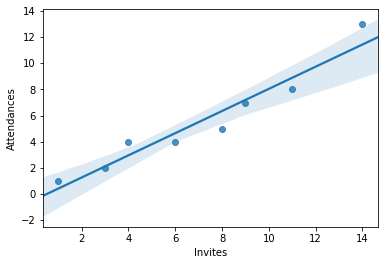

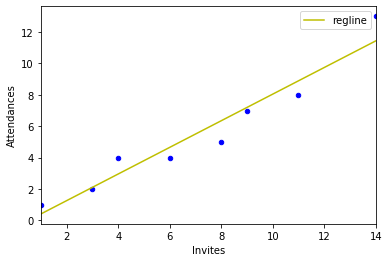

In [13]:
# Your code here.
# using seaborn:
sns.regplot(x="Invites", y="Attendances", data=parties)

# using pandas plots:
slope, intercept, r_value, _, std_err = stats.linregress(parties["Invites"], parties["Attendances"])
parties["regline"]=parties["Invites"]*slope + intercept
print("y = x *",slope, "+",intercept)
print("r-value =", r_value)

axs = parties.plot.scatter(x="Invites", y="Attendances", s=20, c="b")
parties.plot(x="Invites", y="regline", c="y", ax=axs)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [16]:
# Your response here.
# The plot indicates that there is likely a strong positive correlation between
# the two variables. As more people are invited, more people attend the parties.

print("Corr =", r_value)
# Having r-value=0.96 (>0.70) confirms the positive correlation seen in the plot.

# results from regression:
parties["regline"]

Corr = 0.9652303546573691


0     0.409091
1     2.106061
2     2.954545
3     4.651515
4     6.348485
5     7.196970
6     8.893939
7    11.439394
Name: regline, dtype: float64

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [17]:
# Your response here.
# Looking for outliers in "Attendances":
stts = parties.describe()
iqr = stts["Attendances"]["75%"] - stts["Attendances"]["25%"]
lower_cutoff = stts["Attendances"]["25%"] - 1.5 * iqr
upper_cutoff = stts["Attendances"]["75%"] + 1.5 * iqr

outliers = [x for x in parties["Attendances"] if not lower_cutoff<=x<=upper_cutoff]
print(outliers)

# There is one outlier, when "Attendances" = 13:
new_ds = parties[parties["Attendances"]!=13]
new_ds

[13]


,Invites,Attendances,regline
0,1,1,0.409091
1,3,2,2.106061
2,4,4,2.954545
3,6,4,4.651515
4,8,5,6.348485
5,9,7,7.196970
6,11,8,8.893939


y = x * 0.6842105263157895 + 0.32330827067669166
r-value = 0.971278116825086


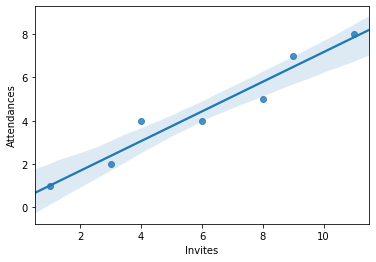

In [18]:
# New diagram:
sns.regplot(x="Invites", y="Attendances", data=new_ds)

# New model:
slope, intercept, r_value, _, std_err = stats.linregress(new_ds["Invites"], new_ds["Attendances"])
print("y = x *",slope, "+",intercept)
print("r-value =", r_value)

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here.
# Slope of the new model is lower (0.68<0.85) because the outlier that was removed
# was above Q4. Correlation value of the new model is also slightly higher (0.97>0.96),
# as all values are now located closer to the prediction line (less error/residual).